<a href="https://colab.research.google.com/github/mallikshubhangi/shulich_data_science/blob/main/Data%20Science%202/DL%20optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from scipy.stats import skew, kurtosis
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [3]:
import tensorflow_datasets as tf

In [4]:
(train, test) = tf.load('mnist',
                                split = ['train','test'])

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
train

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [6]:
test

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [7]:
def load_dataset(train_size, test_size):
    train, test = tf.keras.datasets.mnist.load_data()

    # take a sample
    train_idx = np.random.randint(low=0, high=train[0].shape[0], size=train_size)
    test_idx = np.random.randint(low=0, high=test[0].shape[0], size=test_size)
    X_train = train[0][train_idx].reshape(-1,28*28)
    y_train = train[1][train_idx].reshape(-1,1)
    X_test = test[0][test_idx].reshape(-1,28*28)
    y_test = test[1][test_idx].reshape(-1,1)
    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)

    OH = OneHotEncoder(categories='auto', sparse=False)
    y_train = OH.fit_transform(y_train)
    y_test = OH.transform(y_test)
    print('X_train:',X_train.shape)
    print('y_train:',y_train.shape)
    print('X_test:',X_test.shape)
    print('y_test:',y_test.shape)
    print('Min:', X_train.min())
    print('Max:', X_train.max())

    return X_train, X_test, y_train, y_test

In [8]:
import tensorflow as tf

In [9]:
import urllib3

urllib3.disable_warnings()


In [10]:
X_train, X_test, y_train, y_test = load_dataset(1000,1000)

11490434/11490434 [==============================] - 0s 0us/step
X_train: (1000, 784)
y_train: (1000, 10)
X_test: (1000, 784)
y_test: (1000, 10)
Min: -1.3197704815332454
Max: 31.606961258559586


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
import tensorflow as tf

In [12]:
X_train, X_test, y_train, y_test = load_dataset(60000,10000)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


X_train: (60000, 784)
y_train: (60000, 10)
X_test: (10000, 784)
y_test: (10000, 10)
Min: -1.2796819182573704
Max: 244.9469330289391


In [13]:
init = tf.initializers.zeros()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [14]:
def simple_model(initializer, activation='relu'):
    return tf.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=tf.keras.initializers.glorot_normal())



    ])

In [15]:
from tensorflow.keras import layers

In [16]:
model_zeros = simple_model(init, activate)

In [17]:
model_zeros.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_zeros.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 [==============================] - 5s 105ms/step - loss: 2.3026 - accuracy: 0.1107 - val_loss: 2.3025 - val_accuracy: 0.1164
Epoch 2/10
19/19 [==============================] - 1s 62ms/step - loss: 2.3025 - accuracy: 0.1116 - val_loss: 2.3025 - val_accuracy: 0.1164
Epoch 3/10
19/19 [==============================] - 1s 52ms/step - loss: 2.3025 - accuracy: 0.1116 - val_loss: 2.3024 - val_accuracy: 0.1164
Epoch 4/10
19/19 [==============================] - 1s 61ms/step - loss: 2.3024 - accuracy: 0.1116 - val_loss: 2.3023 - val_accuracy: 0.1164
Epoch 5/10
19/19 [==============================] - 1s 66ms/step - loss: 2.3024 - accuracy: 0.1116 - val_loss: 2.3023 - val_accuracy: 0.1164
Epoch 6/10
19/19 [==============================] - 1s 67ms/step - loss: 2.3023 - accuracy: 0.1116 - val_loss: 2.3022 - val_accuracy: 0.1164
Epoch 7/10
19/19 [==============================] - 1s 47ms/step - loss: 2.3023 - accuracy: 0.1116 - val_loss: 2.3022 - val_accuracy: 0.1164
Epoch 8/10
1

In [18]:
init = tf.initializers.zeros()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [19]:
init = tf.initializers.random_normal()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_normal = simple_model(init, activate)
model_normal.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_normal.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 3s 73ms/step - loss: 2.3028 - accuracy: 0.1187 - val_loss: 2.3024 - val_accuracy: 0.1198
Epoch 2/10
19/19 [==============================] - 1s 41ms/step - loss: 2.3023 - accuracy: 0.1143 - val_loss: 2.3020 - val_accuracy: 0.1181
Epoch 3/10
19/19 [==============================] - 0s 23ms/step - loss: 2.3019 - accuracy: 0.1135 - val_loss: 2.3015 - val_accuracy: 0.1180
Epoch 4/10
19/19 [==============================] - 0s 25ms/step - loss: 2.3015 - accuracy: 0.1128 - val_loss: 2.3011 - val_accuracy: 0.1177
Epoch 5/10
19/19 [==============================] - 0s 25ms/step - loss: 2.3012 - accuracy: 0.1126 - val_loss: 2.3007 - val_accuracy: 0.1174
Epoch 6/10
19/19 [==============================] - 0s 24ms/step - loss: 2.3008 - accuracy: 0.1123 - val_loss: 2.3003 - val_accuracy: 0.1174
Epoch 7/10
19/19 [==============================] - 0s 23ms/step - loss: 2.3005 - accuracy: 0.1121 - val_loss: 2.2999 - val_accuracy: 0.1172
Epoch 8/10
19

In [20]:
init = tf.initializers.glorot_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_glorotu = simple_model(init, activate)
model_glorotu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_glorotu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 4s 70ms/step - loss: 2.3278 - accuracy: 0.1066 - val_loss: 2.2992 - val_accuracy: 0.1145
Epoch 2/10
19/19 [==============================] - 1s 37ms/step - loss: 2.2724 - accuracy: 0.1345 - val_loss: 2.2487 - val_accuracy: 0.1514
Epoch 3/10
19/19 [==============================] - 1s 42ms/step - loss: 2.2228 - accuracy: 0.1762 - val_loss: 2.1988 - val_accuracy: 0.1917
Epoch 4/10
19/19 [==============================] - 1s 36ms/step - loss: 2.1719 - accuracy: 0.2089 - val_loss: 2.1459 - val_accuracy: 0.2214
Epoch 5/10
19/19 [==============================] - 1s 32ms/step - loss: 2.1174 - accuracy: 0.2393 - val_loss: 2.0889 - val_accuracy: 0.2542
Epoch 6/10
19/19 [==============================] - 1s 32ms/step - loss: 2.0584 - accuracy: 0.2706 - val_loss: 2.0273 - val_accuracy: 0.2896
Epoch 7/10
19/19 [==============================] - 0s 24ms/step - loss: 1.9937 - accuracy: 0.3060 - val_loss: 1.9593 - val_accuracy: 0.3281
Epoch 8/10
19

In [21]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_heu = simple_model(init, activate)
model_heu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_heu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 7s 167ms/step - loss: 2.6432 - accuracy: 0.1602 - val_loss: 2.3535 - val_accuracy: 0.2001
Epoch 2/10
19/19 [==============================] - 1s 56ms/step - loss: 2.2489 - accuracy: 0.2254 - val_loss: 2.1338 - val_accuracy: 0.2600
Epoch 3/10
19/19 [==============================] - 1s 49ms/step - loss: 2.0695 - accuracy: 0.2813 - val_loss: 1.9774 - val_accuracy: 0.3144
Epoch 4/10
19/19 [==============================] - 1s 54ms/step - loss: 1.9273 - accuracy: 0.3409 - val_loss: 1.8379 - val_accuracy: 0.3803
Epoch 5/10
19/19 [==============================] - 1s 41ms/step - loss: 1.7928 - accuracy: 0.4033 - val_loss: 1.6998 - val_accuracy: 0.4380
Epoch 6/10
19/19 [==============================] - 1s 45ms/step - loss: 1.6564 - accuracy: 0.4586 - val_loss: 1.5634 - val_accuracy: 0.4841
Epoch 7/10
19/19 [==============================] - 0s 25ms/step - loss: 1.5217 - accuracy: 0.5047 - val_loss: 1.4324 - val_accuracy: 0.5253
Epoch 8/10
1

Text(0, 0.5, 'Validation Accuracy')

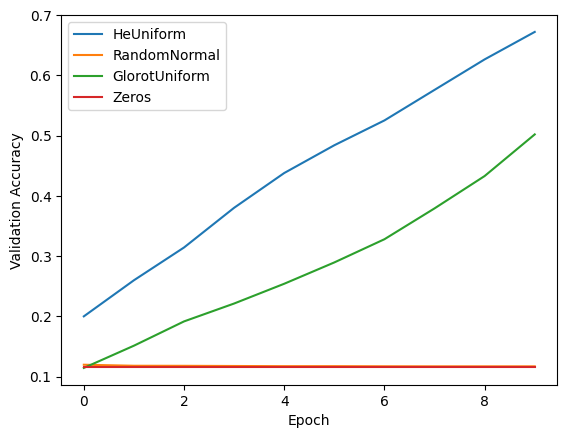

In [23]:
for i in [model_heu, model_normal, model_glorotu, model_zeros]:
    plt.plot(i.history.history['val_accuracy'], label=i.get_config()['layers'][1]['config']['kernel_initializer']['class_name'])

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')

In [24]:
def simple_model_bn(initializer = 'he_uniform', activation='relu'):
    return tf.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=tf.keras.initializers.glorot_normal())



    ])

In [25]:
simple_model_bn().summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                25120     
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_21 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_22 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_2 (Bat  (None, 32)               

In [26]:
init = tf.keras.initializers.random_normal()
activate = 'relu'

optimizer = tf.keras.optimizers.SGD(0.01)
model_bn = simple_model_bn(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 4s 52ms/step - loss: 2.0562 - accuracy: 0.3330 - val_loss: 2.2931 - val_accuracy: 0.2386
Epoch 2/10
19/19 [==============================] - 1s 32ms/step - loss: 1.3922 - accuracy: 0.5576 - val_loss: 2.2802 - val_accuracy: 0.2755
Epoch 3/10
19/19 [==============================] - 1s 31ms/step - loss: 1.1275 - accuracy: 0.6518 - val_loss: 2.2631 - val_accuracy: 0.2892
Epoch 4/10
19/19 [==============================] - 1s 35ms/step - loss: 0.9577 - accuracy: 0.7128 - val_loss: 2.2398 - val_accuracy: 0.3016
Epoch 5/10
19/19 [==============================] - 1s 37ms/step - loss: 0.8368 - accuracy: 0.7541 - val_loss: 2.2084 - val_accuracy: 0.3226
Epoch 6/10
19/19 [==============================] - 1s 37ms/step - loss: 0.7456 - accuracy: 0.7842 - val_loss: 2.1672 - val_accuracy: 0.3567
Epoch 7/10
19/19 [==============================] - 1s 50ms/step - loss: 0.6762 - accuracy: 0.8048 - val_loss: 2.1144 - val_accuracy: 0.4133
Epoch 8/10
19